# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Data

In [2]:
df = pd.read_csv('../input/chess/games.csv')

In [3]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


# EDA

## Who wins more?

In [4]:
df.winner.value_counts()

white    10001
black     9107
draw       950
Name: winner, dtype: int64

In [5]:
print('White appears to win', round(10001 / 20058, 2) * 100, '% of the games')
print('while Black wins', round(9107 / 20058, 2) * 100, '% of the games')
print('and', round(950 / 20058, 2) * 100, '% of the games are a draw')

White appears to win 50.0 % of the games
while Black wins 45.0 % of the games
and 5.0 % of the games are a draw


## Which openings have the most wins?

In [6]:
#This cell creates a dataframe where openings are aggregated by the number of wins for each side
open_df = df.groupby(by='opening_name').winner.value_counts()
open_df = open_df.reset_index(name='wins')
open_df = open_df.sort_values(by='wins', ascending=False)

In [7]:
#The dataframes are splits by whether black or white won
black_wins = open_df[open_df['winner'] == 'black']
white_wins = open_df[open_df['winner'] == 'white']

In [8]:
black_wins.head()

,opening_name,winner,wins
2647,Van't Kruijs Opening,black,226
2189,Sicilian Defense,black,194
2220,Sicilian Defense: Bowdler Attack,black,164
2064,Scandinavian Defense,black,123
654,French Defense: Knight Variation,black,121


In [9]:
white_wins.head()

,opening_name,winner,wins
2095,Scandinavian Defense: Mieses-Kotroc Variation,white,164
2190,Sicilian Defense,white,149
2113,Scotch Game,white,145
653,French Defense: Knight Variation,white,135
1451,Philidor Defense #3,white,127


In [10]:
#This cell takes the top 5 openings for each side and gets the amount of wins as a percentage
black_winner = list(black_wins.head().opening_name)
white_winner = list(white_wins.head().opening_name)
winner = black_winner + white_winner
dataframes = []
for x in winner:
    temp = open_df[open_df['opening_name'] == x]
    temp['sum'] = temp.wins.sum().astype(int)
    temp['percentage'] = temp['wins'] / temp['sum']
    dataframes.append(temp)
win_prob = dataframes[0]
for x in dataframes[1:]:
    win_prob = pd.concat([win_prob, x])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Text(0, 0.5, 'Percentage(Out of 1)')

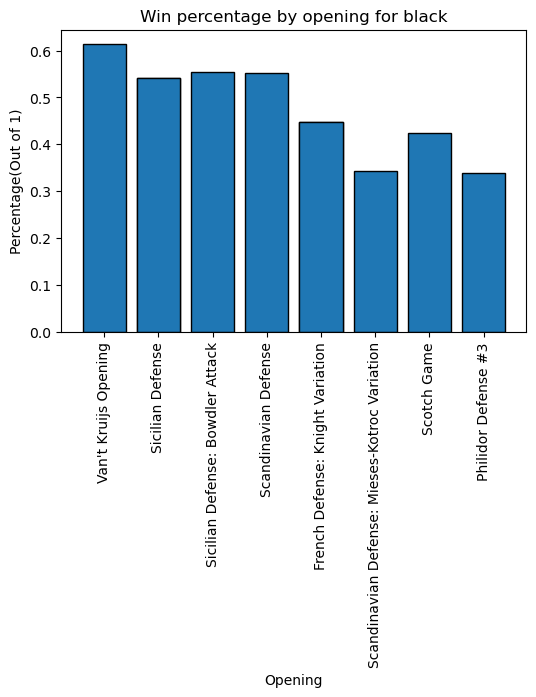

In [11]:
x = win_prob[win_prob['winner'] == 'black'].opening_name
y = win_prob[win_prob['winner'] == 'black'].percentage
plt.figure(dpi=100)
plt.bar(x, height=y, edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Win percentage by opening for black')
plt.xlabel('Opening')
plt.ylabel('Percentage(Out of 1)')

Text(0, 0.5, 'Percentage(Out of 1)')

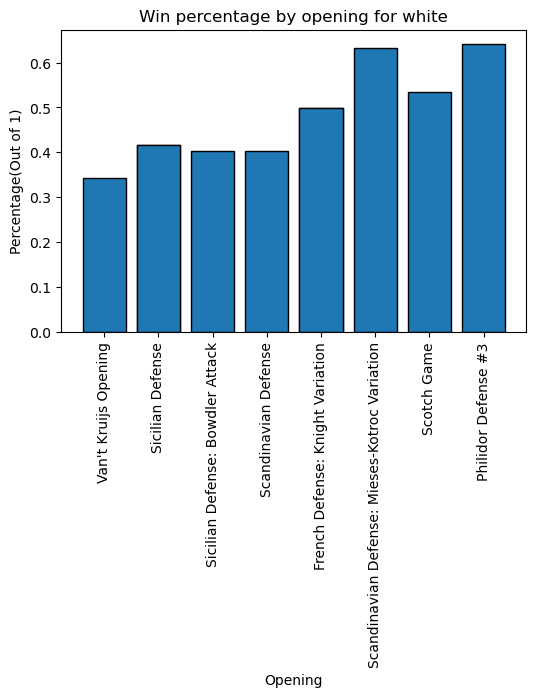

In [12]:
x = win_prob[win_prob['winner'] == 'white'].opening_name
y = win_prob[win_prob['winner'] == 'white'].percentage
plt.figure(dpi=100)
plt.bar(x, height=y, edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Win percentage by opening for white')
plt.xlabel('Opening')
plt.ylabel('Percentage(Out of 1)')

## Who are the top players?

In [13]:
#This cell puts white id and black id under a common column and puts them into one dataframe
mask = ['white_id', 'white_rating']
white_player_df = df[mask]
white_player_df.columns = ['player_id', 'player_rating']
mask = ['black_id', 'black_rating']
black_player_df = df[mask]
black_player_df = black_player_df[mask]
black_player_df.columns = ['player_id', 'player_rating']
player_df = pd.concat([white_player_df, black_player_df])

In [14]:
#This cell takes the max rating for each id
ID = []
rating = []
for x in player_df.player_id.unique():
    ID.append(x)
    temp = player_df[player_df['player_id'] == x]
    rating.append(temp.player_rating.max())
player_df = pd.DataFrame()
player_df['player_id'] = np.array(ID)
player_df['player_rating'] = np.array(rating)

Text(0, 0.5, 'Player ID')

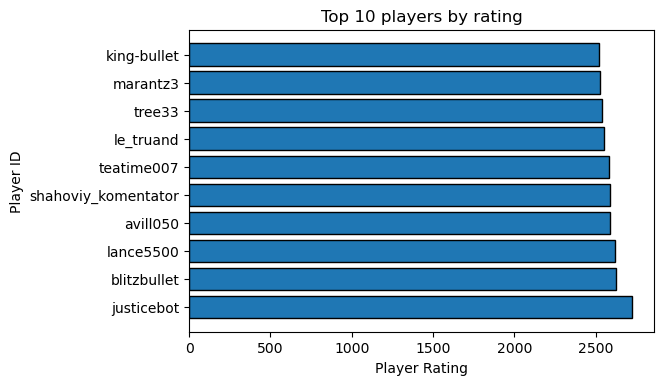

In [15]:
top_10 = player_df.sort_values(by='player_rating', ascending=False).head(10)
plt.figure(dpi=100)
plt.barh(y=top_10.player_id, width=top_10.player_rating, edgecolor='black')

plt.title('Top 10 players by rating')
plt.xlabel('Player Rating')
plt.ylabel('Player ID')

Text(0, 0.5, 'Player ID')

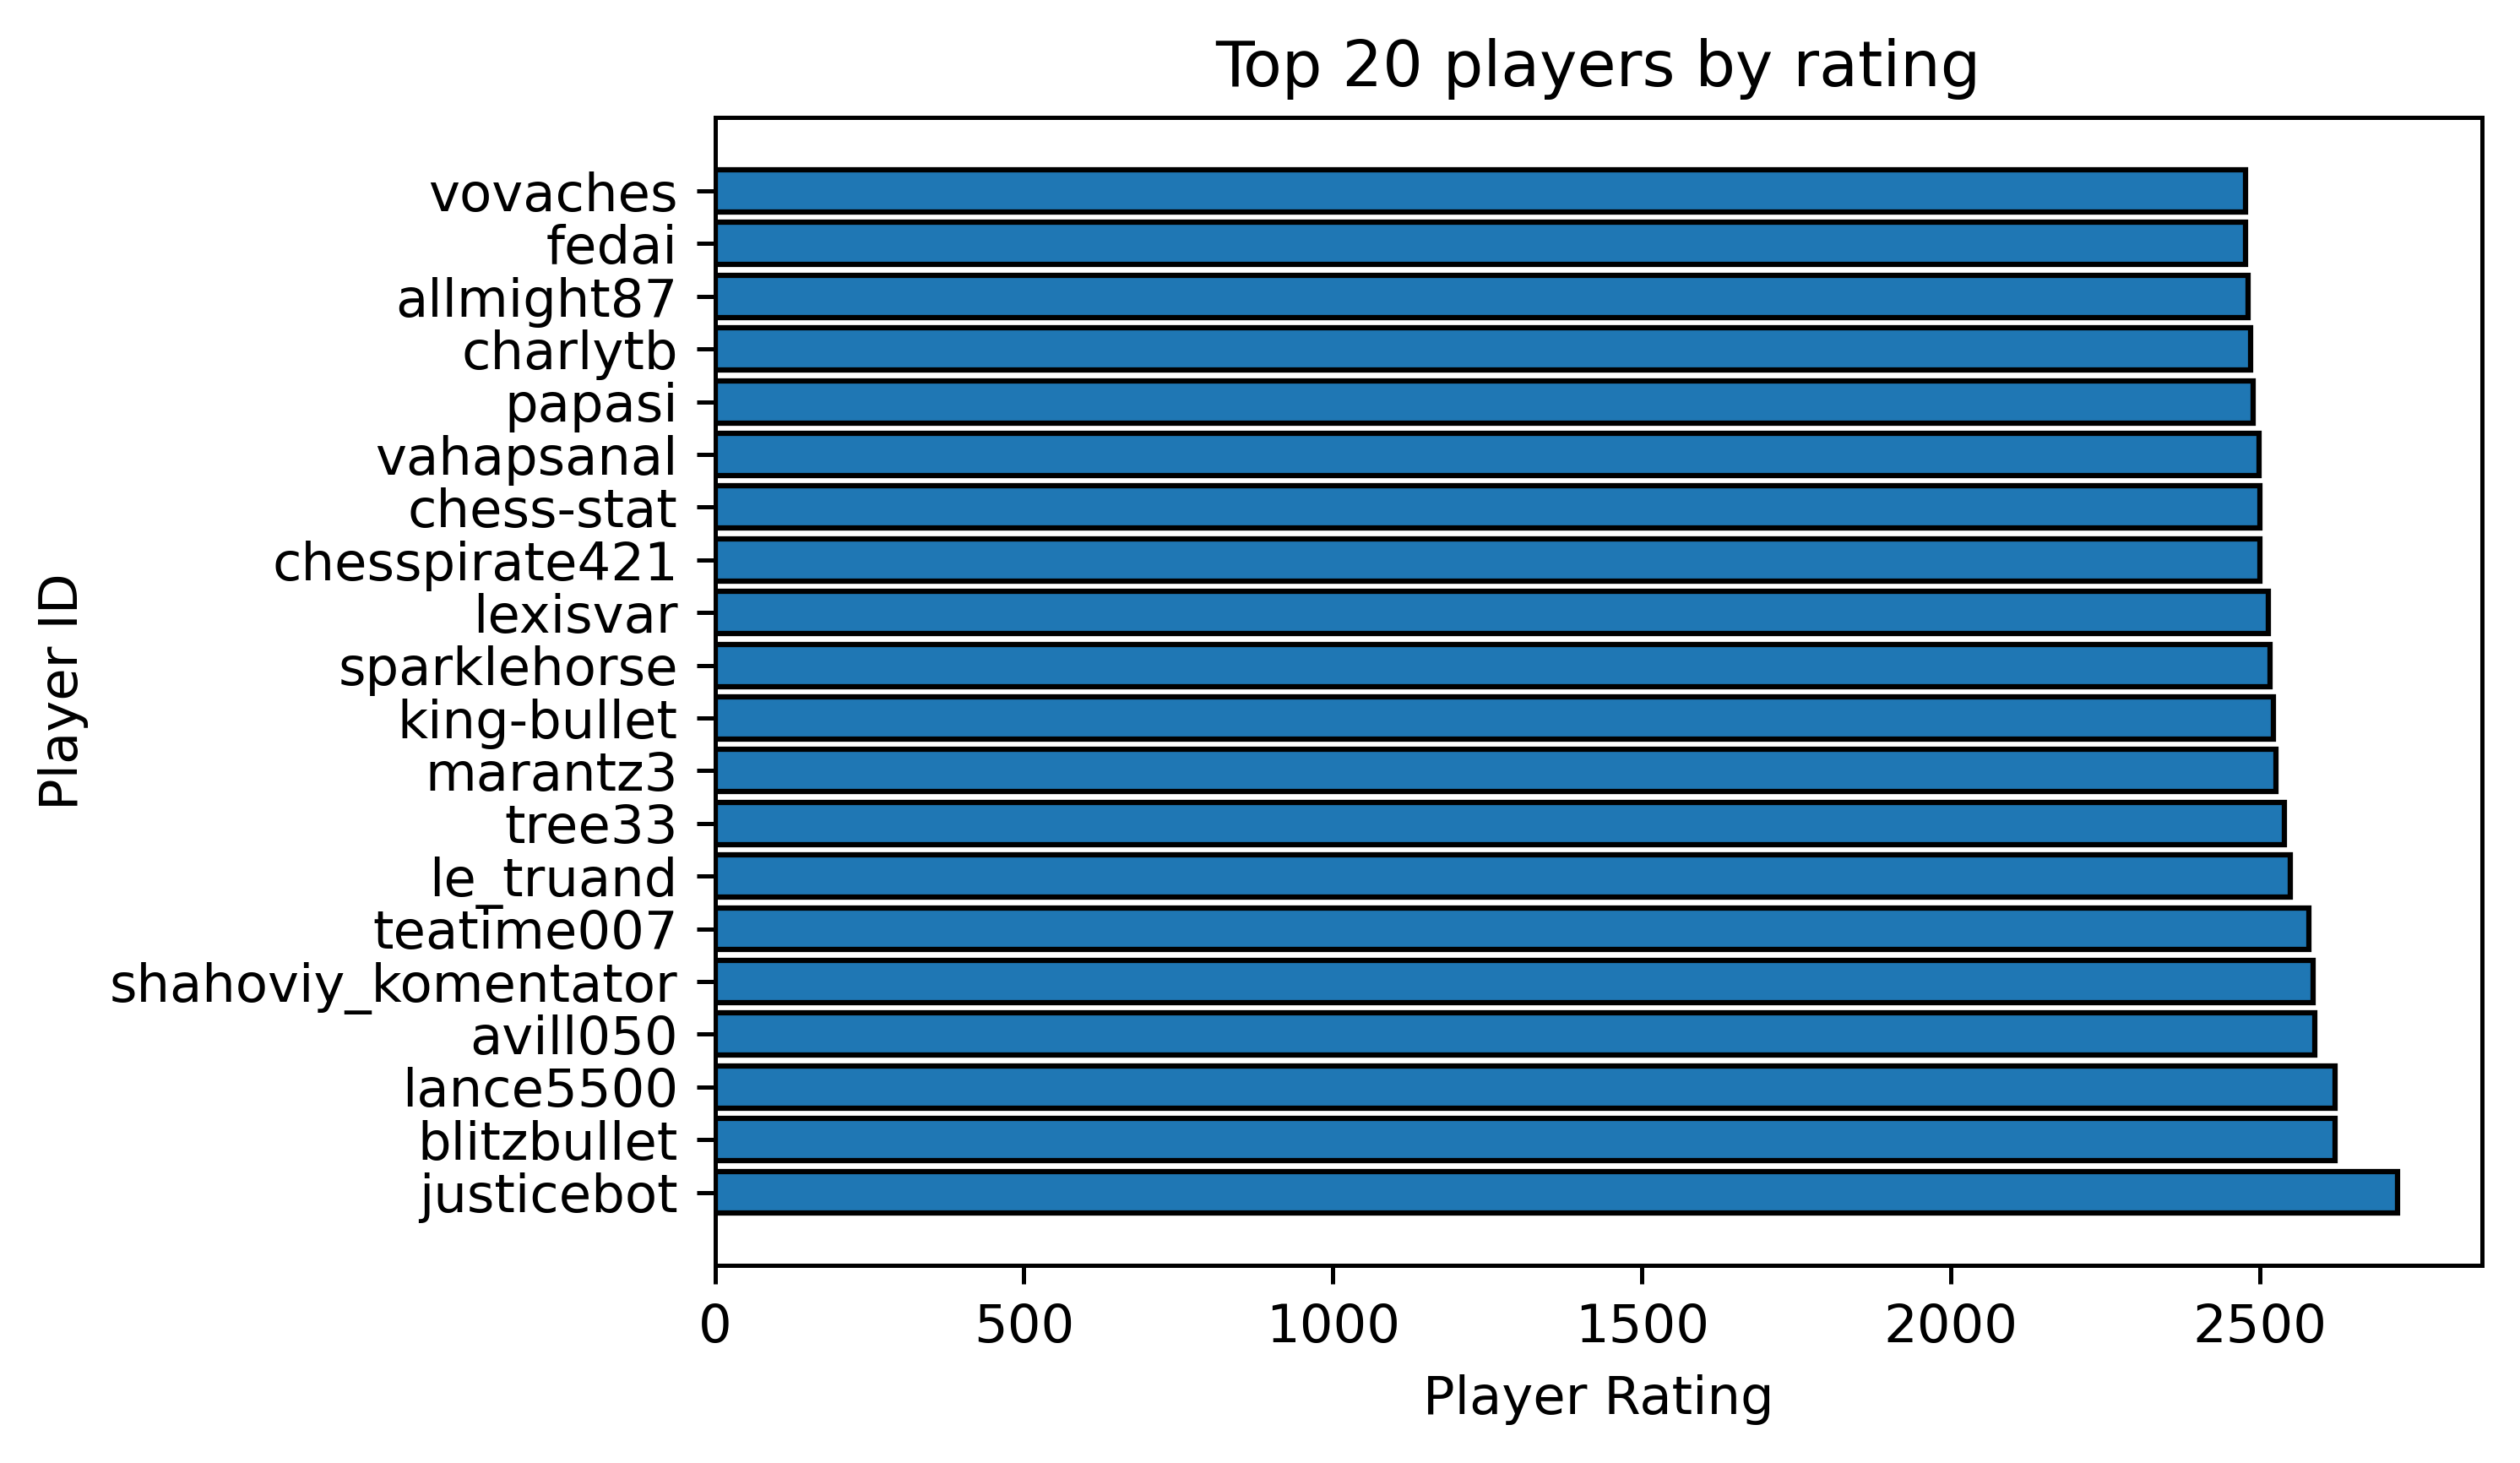

In [16]:
top_20 = player_df.sort_values(by='player_rating', ascending=False).head(20)
plt.figure(dpi=450)
plt.barh(y=top_20.player_id, width=top_20.player_rating, edgecolor='black')

plt.title('Top 20 players by rating')
plt.xlabel('Player Rating')
plt.ylabel('Player ID')

## How are most games resolved?

In [17]:
#This cell turns value counts into a dataframe
resolve = pd.DataFrame(df.victory_status.value_counts())
resolve = resolve.reset_index()

Text(0, 0.5, 'Number of occurances')

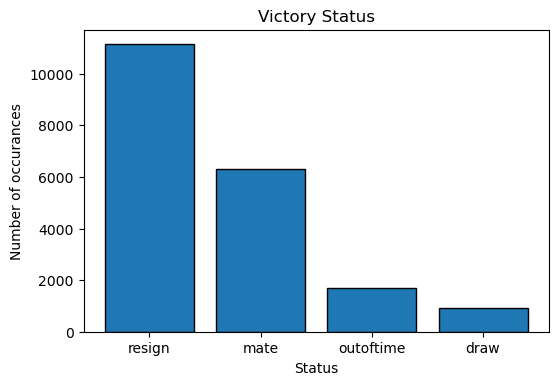

In [18]:
plt.figure(dpi=100)
plt.bar(x=resolve['index'], height=resolve.victory_status, edgecolor='black')
plt.title('Victory Status')
plt.xlabel('Status')
plt.ylabel('Number of occurances')

Text(0, 0.5, 'Number of turns')

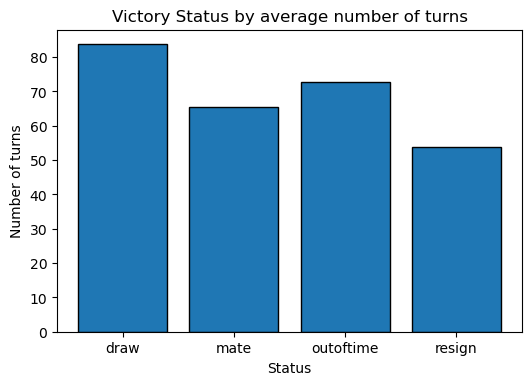

In [19]:
turn_df = df.groupby(by='victory_status').turns.mean().reset_index()
plt.figure(dpi=100)
plt.bar(x=turn_df.victory_status, height=turn_df.turns, edgecolor='black')
plt.title('Victory Status by average number of turns')
plt.xlabel('Status')
plt.ylabel('Number of turns')

## What role does rating play in victory?

In [20]:
#For each game, it takes the difference between the winner and the loser
difference = []
for x in range(df.shape[0]):
    temp = df.iloc[x]
    if temp['winner'] == 'white':
        diff = temp.white_rating - temp.black_rating
        difference.append(diff)
    elif temp['winner'] == 'black':
        diff = temp.black_rating - temp.white_rating
        difference.append(diff)
    else:
        ratings = [temp.black_rating, temp.white_rating]
        diff = max(ratings) - min(ratings)
        difference.append(diff)
df['Difference'] = np.array(difference)

Text(0, 0.5, 'Difference in rating')

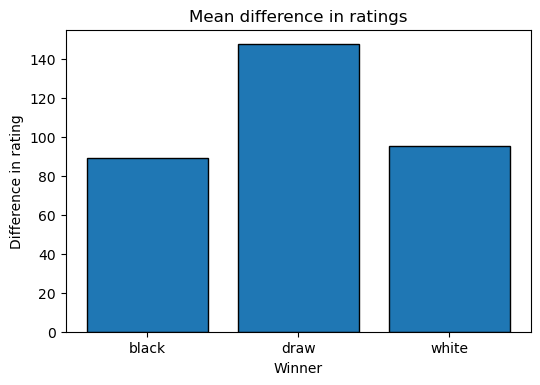

In [21]:
mean_df = df.groupby(by='winner').Difference.mean().reset_index()
plt.figure(dpi=100)
plt.bar(x=mean_df['winner'], height=mean_df.Difference, edgecolor='black')
plt.title('Mean difference in ratings')
plt.xlabel('Winner')
plt.ylabel('Difference in rating')

Text(0, 0.5, 'Difference in rating')

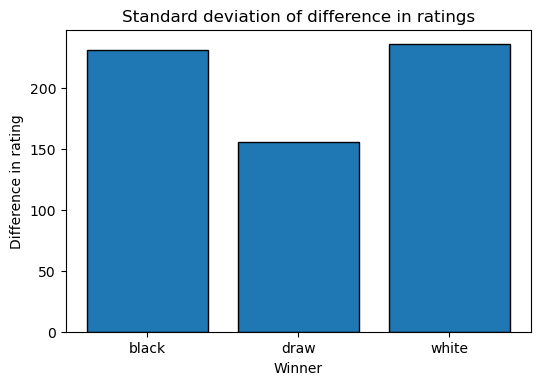

In [22]:
mean_df = df.groupby(by='winner').Difference.std().reset_index()
plt.figure(dpi=100)
plt.bar(x=mean_df['winner'], height=mean_df.Difference, edgecolor='black')
plt.title('Standard deviation of difference in ratings')
plt.xlabel('Winner')
plt.ylabel('Difference in rating')

# Machine Learning

## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

cols = ['white_rating', 'black_rating']
X = df[cols]
y = df['winner']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

In [24]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [25]:
lr.score(X_test, y_test)

0.6218218075635639

It's not groundbreaking but 62% accuracy based purely on ratings isn't bad.

In [26]:
#Let's test this with a hypothetical match up with white rated 1463 and black rated 1500
test = np.array([1463, 1500])
test = test.reshape(1, -1)
print(lr.predict(test))
print(max(lr.predict_proba(test)[0]))
print((lr.predict_proba(test)[0]))

['black']
0.4829238697756855
[0.48292387 0.05948878 0.45758735]


We see that the model predicts that black will win but it is only 48% certain(remember that there is around a 6% chance that this game could end in a draw)

In [27]:
#Let's test this again with a far more distant rating
test = np.array([1686, 1523])
test = test.reshape(1, -1)
print(lr.predict(test))
print(max(lr.predict_proba(test)[0]))
print((lr.predict_proba(test)[0]))

['white']
0.6397092242927342
[0.30840071 0.05189006 0.63970922]


Now we see that the model predicts white will win with 64% certainty.